<a href="https://colab.research.google.com/github/debstS/London-cycle-rental-analysis/blob/main/Copy_of_London_Cycle_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**


## Web Scraping csv files from the given path

We will begin by downloading the 142 dataset files from 2021 to 2023, starting from the '246JourneyDataExtract30Dec2020-05Jan2021.csv' file, from the TFL website (https://cycling.data.tfl.gov.uk), from usage-stats/ path, till '386JourneyDataExtract15Dec2023-31Dec2023', as this is the final dataset for year 2023.

Let's download some important libraries to do that.

'BeatifulSoup' is a web scraping library which help us to scrape or extract selective data from a website, using either public API endpoints made available by the data-owning website, or by using other scraping methods in absence of an API.

There was some issue with scraping these files directly from the URL, from usage-stats folder, which is why we will go with mounting the files onto google drive, to be accessible within Google colab notebook.

We will download them to Google Drive to be used within this Google Colab notebook.

In [ ]:
# to mount Google drive files for accessing from within Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import all relevant libraries

We will start with importing all relevant libraries-

Pandas - both for mathematical computations and for data analysis for any Data Scienc project.

Glob - It is used to search huge no of CSV files and for text in files

In [ ]:
import os
import pandas as pd
import glob
import multiprocessing


In [ ]:
#copy and paste the path where the dataset is stored in your computer

os.chdir("/content/drive/MyDrive/TFL Cycle rental analysis - datasets")



It was observed that from the dataset '335JourneyDataExtract12Sep2022-18Sep2022' onwards, 2 additional columns were present in the following datasets - 'Bike model' and 'Total duration (ms)'. This will cause a problem when we try and merge all the datafiles to obtain one unified complete dataset to pre-process and perform further analysis on.

We will try and take this factor into account in the next step as part of data preprocessing. We will rename the columns to have consistent naming pattern for same data columns for all the datasets. This is done so that we can concatenate all the 142 separate data files over a period of 142 weeks. This is important as the concat() function in Pandas library concatenates data between dataframes on the basis of columns with matching names (it keeps the ordering of columns from 1st Dataframe, and is intuitive enough to match and concat values into respective columns on basis of matching names instead of order).

It also keeps the additional columns after having concatenated all the matching columns, and fill those fields with 'NaN' values in the final, merged dataset for which there are no records from older data files, as they didn't exist in the older datasets.

Please note that below function takes some time (approx 4 mins) to run.

In [ ]:
def read_csv_file(file):
    df = pd.read_csv(file, low_memory=False)
    df.rename(columns={'Rental Id': 'Number', 'Duration': 'Total duration', 'Bike Id': 'Bike number',
                       'End Date': 'End date', 'EndStation Id': 'End station number', 'EndStation Name': 'End station',
                       'Start Date': 'Start date', 'StartStation Id': 'Start station number',
                       'StartStation Name': 'Start station'}, inplace=True)
    return df

# Step 1: List all CSV files in the directory
csv_files = glob.glob("*.csv")  # Assumes all CSV files are in the same directory

# Step 2: Read each CSV file using multiprocessing and store them in a list
df_list = []
pool = multiprocessing.Pool()  # Create a multiprocessing pool

try:
    df_list = pool.map(read_csv_file, csv_files)  # Apply the function to each file in parallel
finally:
    pool.close()
    pool.join()




Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkPoolWorker-2:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 131, in worker
    put((job, i, result))
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 371, in put
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
Traceback (most recent call last):
  File "pandas/_libs/internals.pyx", line 619, in pandas._libs.internals.SharedBlock.__reduce__
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "pandas/_libs/internals.pyx", line 620, in pandas._libs.internals.SharedBlock.__reduce__
  File "/usr/lib/python3.10/multiprocessing/process.py

KeyboardInterrupt: 

In the above code, 'Multiprocessing' module is used to leverage parallel processing to read and process CSV files concurrently as it was taking long time to exceute the operations of reading the csv files as dataframes into a list, renaming the columns, and then concatenating all dataframes into a single dataset.

This code will utilize multiple CPU cores to read and process CSV files concurrently, thus improving the overall performance.

The columns were renamed to make sure the column names align from the older datasets, which didn't have the 'bike model' and 'Total duration' columns.

In [ ]:
#['Start date'] = pd.to_datetime(final_df_tfl_cycle_rentals['Start date'], format='%d/%m/%Y %H:%M')

# Concat all the files to form a final dataset for Exploratory data analysis

Now that we have a list of all the 142 data files which are dataframes actually, we want to concat all the records. 'ignore_index=True' makes sure teh final dataset has a uniform indexing order.

We will concat all the 142 files. Please make sure to use ignore_index=True to keep the uniform index order in final dataset.



In [ ]:
# Concatenate all DataFrames in the list
final_df_tfl_cycle_rentals = pd.concat(df_list, ignore_index=True)

# Display shape of the final DataFrame
print(final_df_tfl_cycle_rentals.shape)

(30786752, 11)


So our final dataset size is 30786752 rows and 11 columns.

Checking a few records -

In [ ]:
final_df_tfl_cycle_rentals.head(5)

,Number,Total duration,Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration (ms)
0,104820582,1620,22,03/01/2021 15:14,11,"Brunswick Square, Bloomsbury",03/01/2021 14:47,542,"Salmon Lane, Limehouse",NaN,NaN
1,104816169,1740,10755,03/01/2021 13:26,542,"Salmon Lane, Limehouse",03/01/2021 12:57,546,"New Fetter Lane, Holborn",NaN,NaN
2,104757113,1620,18908,30/12/2020 15:00,239,"Warren Street Station, Euston",30/12/2020 14:33,779,"Houndsditch, Aldgate",NaN,NaN
3,104749458,780,18499,30/12/2020 09:21,766,"Ram Street, Wandsworth",30/12/2020 09:08,653,"Simpson Street, Clapham Junction",NaN,NaN
4,104788389,5400,15668,01/01/2021 16:29,655,"Crabtree Lane, Fulham",01/01/2021 14:59,655,"Crabtree Lane, Fulham",NaN,NaN


In [ ]:
# Doing a few random checks below to cross-check a few records from older datasets from 2021 and newer ones from late 2022 and later-

##'Rental Id' = 110938519 from file '277JourneyDataExtract04Aug2021-10Aug2021'
final_df_tfl_cycle_rentals[final_df_tfl_cycle_rentals['Number'] == 110938519]


,Number,Total duration,Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration (ms)
5953192,110938519,240,14503,04/08/2021 13:51,242,"Beaumont Street, Marylebone",04/08/2021 13:47,76,"Longford Street, The Regent's Park",NaN,NaN


In [ ]:
##'Rental Id' = 134489507 from file '380JourneyDataExtract15Sep2023-30Sep2023'
final_df_tfl_cycle_rentals[final_df_tfl_cycle_rentals['Number'] == 134489507]

,Number,Total duration,Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration (ms)
28421821,134489507,16m 29s,57534,2023-10-01 00:16,1214,"Kensington Olympia Station, Olympia",2023-09-30 23:59,300079,"London Street, Paddington",CLASSIC,989750.0


### So we did the double-checks and found that the data is consistent. We can now proceed with further analysis.

In [ ]:
# Explore the structure of the dataset

final_df_tfl_cycle_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30786752 entries, 0 to 30786751
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Number                int64  
 1   Total duration        object 
 2   Bike number           int64  
 3   End date              object 
 4   End station number    object 
 5   End station           object 
 6   Start date            object 
 7   Start station number  object 
 8   Start station         object 
 9   Bike model            object 
 10  Total duration (ms)   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 2.5+ GB


## **Data preprocessing and manipulation**


Now we will continue with data cleaning, preprocessing and transformation.

We can see from the above output that the columns with the datetime data are of type 'object'. For ease of manipulation, we will convert the datatypes of these columns into datetime format in next steps.:

In [ ]:
# convert 'object' data type for Date columns into 'Datetime' format

final_df_tfl_cycle_rentals['Start date'] = pd.to_datetime(final_df_tfl_cycle_rentals['Start date'], format='%d/%m/%Y %H:%M', errors='coerce')
final_df_tfl_cycle_rentals['End date'] = pd.to_datetime(final_df_tfl_cycle_rentals['End date'], format='%d/%m/%Y %H:%M', errors='coerce')



In [ ]:
final_df_tfl_cycle_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30786752 entries, 0 to 30786751
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Number                int64         
 1   Total duration        object        
 2   Bike number           int64         
 3   End date              datetime64[ns]
 4   End station number    object        
 5   End station           object        
 6   Start date            datetime64[ns]
 7   Start station number  object        
 8   Start station         object        
 9   Bike model            object        
 10  Total duration (ms)   float64       
 11  Total duration (s)    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 2.8+ GB


In [ ]:
# Convert 'Total duration' to a total seconds format for easier analysis
#final_df_tfl_cycle_rentals['Total duration (s)'] = final_df_tfl_cycle_rentals['Total duration (ms)'] / 1000
final_df_tfl_cycle_rentals.drop(['Total duration (s)'], axis=1, inplace=True)


# Check missing values in the final dataset

Now that we have merged so many dataframes, some of which had additional columns and some didn't, this means that the new final dataset will now have likely missing values for the records from older data files, which didn't have the extra columns from relatively newer data files. So the corresponding fields for those columns will be 'NaN' in the final dataset.

Let's put our theory to test in next steps.

In [ ]:
#check missing values

final_df_tfl_cycle_rentals.isna().sum()

Number                         0
Total duration                 0
Bike number                    0
End date                11059475
End station number        312144
End station                    0
Start date              11059475
Start station number           0
Start station                  0
Bike model              19727277
Total duration (ms)     19727277
Total duration (s)      19727277
dtype: int64

In [ ]:
# Assume your DataFrame is named df
# Check 'Start date' column for 'not a timestamp' values
not_a_timestamp_start_date = pd.to_datetime(final_df_tfl_cycle_rentals['Start date'], errors='coerce').isna()

# Check 'End date' column for 'not a timestamp' values
not_a_timestamp_end_date = pd.to_datetime(final_df_tfl_cycle_rentals['End date'], errors='coerce').isna()

# Combine the results
not_a_timestamp_values = not_a_timestamp_start_date | not_a_timestamp_end_date

# Filter the DataFrame to get rows with 'not a timestamp' values
rows_with_not_a_timestamp = final_df_tfl_cycle_rentals[not_a_timestamp_values]

# Display rows with 'not a timestamp' values
print(rows_with_not_a_timestamp)


             Number Total duration  Bike number End date End station number  \
19727277  125230172     2h 12m 14s        54170      NaT             200222   
19727278  125230173        12m 16s        50087      NaT             001194   
19727279  125230174        15m 29s        54561      NaT             300019   
19727280  125230175        23m 31s        54324      NaT             300252   
19727281  125230176        23m 20s        22065      NaT             300252   
...             ...            ...          ...      ...                ...   
30786747  136236512         5m 48s        17305      NaT                962   
30786748  136236513        24m 39s        42197      NaT               1080   
30786749  136236514         2m 27s        58650      NaT               1001   
30786750  136236515        15m 59s        56402      NaT             300097   
30786751  136236516        40m 46s        35802      NaT             300050   

                                 End station Start 

We can see we have null values in 3 columns. To make a decision on how to deal with these null value fields, it would be worth calculating the percentage of null values per column.

In [ ]:
#Function below which gives out missing value percentage per column
def get_missings(final_df_tfl_cycle_rentals):
    labels,values = list(),list()
    for column in final_df_tfl_cycle_rentals.columns:
           if df[column].isnull().sum():
            labels.append(column)
            values.append((df[column].isnull().sum() / len(df[column]))*100)
            missings=pd.DataFrame({'Column':labels,'Missing(Percent)':values}).sort_values(by='Missing(Percent)', ascending=False)
    return missings

df_nan = get_missings(final_df_tfl_cycle_rentals).head(20)
df_nan

In [ ]:
# check the conversion was successful or not
final_df_tfl_cycle_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93002 entries, 0 to 93001
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rental Id          93002 non-null  int64 
 1   Duration           93002 non-null  int64 
 2   Bike Id            93002 non-null  int64 
 3   End Date           93002 non-null  object
 4   EndStation Id      93002 non-null  int64 
 5   EndStation Name    93002 non-null  object
 6   Start Date         93002 non-null  object
 7   StartStation Id    93002 non-null  int64 
 8   StartStation Name  93002 non-null  object
dtypes: int64(5), object(4)
memory usage: 6.4+ MB


In [ ]:
# Explore the distribution of the dataset
final_df_tfl_cycle_rentals.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93002 entries, 0 to 93001
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rental Id          93002 non-null  int64         
 1   Duration           93002 non-null  int64         
 2   Bike Id            93002 non-null  int64         
 3   End Date           93002 non-null  datetime64[ns]
 4   EndStation Id      93002 non-null  int64         
 5   EndStation Name    93002 non-null  object        
 6   Start Date         93002 non-null  datetime64[ns]
 7   StartStation Id    93002 non-null  int64         
 8   StartStation Name  93002 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.4+ MB


In [ ]:
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse"
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn"
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate"
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction"
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham"


The 'Duration' column doesn't say what's the unit for it, so we are going to assume its in seconds. I have also verified this assumption in the following steps, by doing a difference in the start and end date for one leg of the trip.


In [ ]:
final_df_tfl_cycle_rentals["Duration_in_mins"] =  final_df_tfl_cycle_rentals['Duration']/60

final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Duration_in_mins
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",27.0
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",29.0
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",27.0
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",13.0
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",90.0


In [ ]:
final_df_tfl_cycle_rentals["Timestamp_Difference"] = final_df_tfl_cycle_rentals['End Date']-final_df_tfl_cycle_rentals['Start Date']

final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Duration_in_mins,Timestamp_Difference
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",27.0,0 days 00:27:00
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",29.0,0 days 00:29:00
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",27.0,0 days 00:27:00
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",13.0,0 days 00:13:00
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",90.0,0 days 01:30:00


So we have verified that the 'Duration' column is in SECONDS using the above steps. We don't need the 2 extra columns we added, so we are going to remove those in next steps.

In [ ]:
final_df_tfl_cycle_rentals.drop(['Duration_in_mins','Timestamp_Difference'], axis=1, inplace = True)

In [ ]:
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse"
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn"
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate"
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction"
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham"


In [ ]:
# Double checking the missing values or 'NaN' values

final_df_tfl_cycle_rentals.isna().sum()


Rental Id            0
Duration             0
Bike Id              0
End Date             0
EndStation Id        0
EndStation Name      0
Start Date           0
StartStation Id      0
StartStation Name    0
dtype: int64

In [ ]:
final_df_tfl_cycle_rentals.isnull().sum()


Rental Id            0
Duration             0
Bike Id              0
End Date             0
EndStation Id        0
EndStation Name      0
Start Date           0
StartStation Id      0
StartStation Name    0
dtype: int64

Let's now explore the underlying distribution of the numerical columns in the dataset.

This will give us an idea about which features (or columns or variable, all are interchangeably used throughout this notebook) can be most relevant in our analysis, and for building a robust model.

# **Exploratory Data Analysis**

In [ ]:
final_df_tfl_cycle_rentals.describe()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id
count,9.300200e+04,93002.000000,93002.000000,93002,93002.000000,93002,93002.000000
mean,1.047973e+08,1618.138750,13294.834649,2021-01-02 07:17:02.183824128,412.711920,2021-01-02 06:50:04.045074432,413.126567
min,1.047482e+08,60.000000,2.000000,2020-12-30 00:07:00,1.000000,2020-12-30 00:01:00,1.000000
25%,1.047728e+08,600.000000,8839.000000,2020-12-31 14:30:00,199.000000,2020-12-31 14:04:00,199.000000
50%,1.047973e+08,1020.000000,15538.000000,2021-01-02 13:16:00,393.000000,2021-01-02 12:47:00,397.000000
75%,1.048218e+08,1560.000000,18215.000000,2021-01-03 16:03:00,626.000000,2021-01-03 15:37:00,625.000000
max,1.048461e+08,572400.000000,19881.000000,2021-01-05 23:59:00,844.000000,2021-01-05 23:54:00,844.000000
std,2.828707e+04,5784.506627,5854.841148,NaN,244.930345,NaN,244.846500


Let's check the same for the categorical variables in the dataset (columns with non-numerical or 'categories' of values, such as both end and start Station name columns)

In [ ]:
#To view the columns quickly
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse"
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn"
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate"
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction"
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham"


In [ ]:
print("\nSummary of categorical data:")
for col in ['EndStation Name']:
    print(f"\nDistribution of {col}:")
    print(final_df_tfl_cycle_rentals[col].value_counts())


Summary of categorical data:

Distribution of EndStation Name:
EndStation Name
Hyde Park Corner, Hyde Park          881
Hop Exchange, The Borough            717
Westminster Pier, Westminster        659
Wellington Arch, Hyde Park           649
Serpentine Car Park, Hyde Park       499
                                    ... 
Greenberry Street, St.John's Wood     19
Santos Road, Wandsworth               18
Carey Street, Holborn                 17
Colet Gardens, Hammersmith            16
South Quay East, Canary Wharf         12
Name: count, Length: 791, dtype: int64


In [ ]:
for col in ['StartStation Name']:
    print(f"\nDistribution of {col}:")
    print(final_df_tfl_cycle_rentals[col].value_counts())


Distribution of StartStation Name:
StartStation Name
Hyde Park Corner, Hyde Park       895
Westminster Pier, Westminster     636
Wellington Arch, Hyde Park        631
Serpentine Car Park, Hyde Park    510
Hop Exchange, The Borough         488
                                 ... 
Colet Gardens, Hammersmith         21
Clarges Street, Mayfair            21
Carey Street, Holborn              19
Sirdar Road, Avondale              19
South Quay East, Canary Wharf      10
Name: count, Length: 791, dtype: int64


## Data Visualization

Now its time for some visual representations of what we are trying to look at here.


We will now plot the Top 20 for both Start and End stations by number of highest cycle rentals.



In [ ]:
# Import all relevant data viz libraries


import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# We will analyze the frequency of bike rentals across different start stations
# To do this, we will fetch top 20 start stations for cycle bike rentals.


rentaltop20_start_stations = final_df_tfl_cycle_rentals['StartStation Name'].value_counts().head(20)


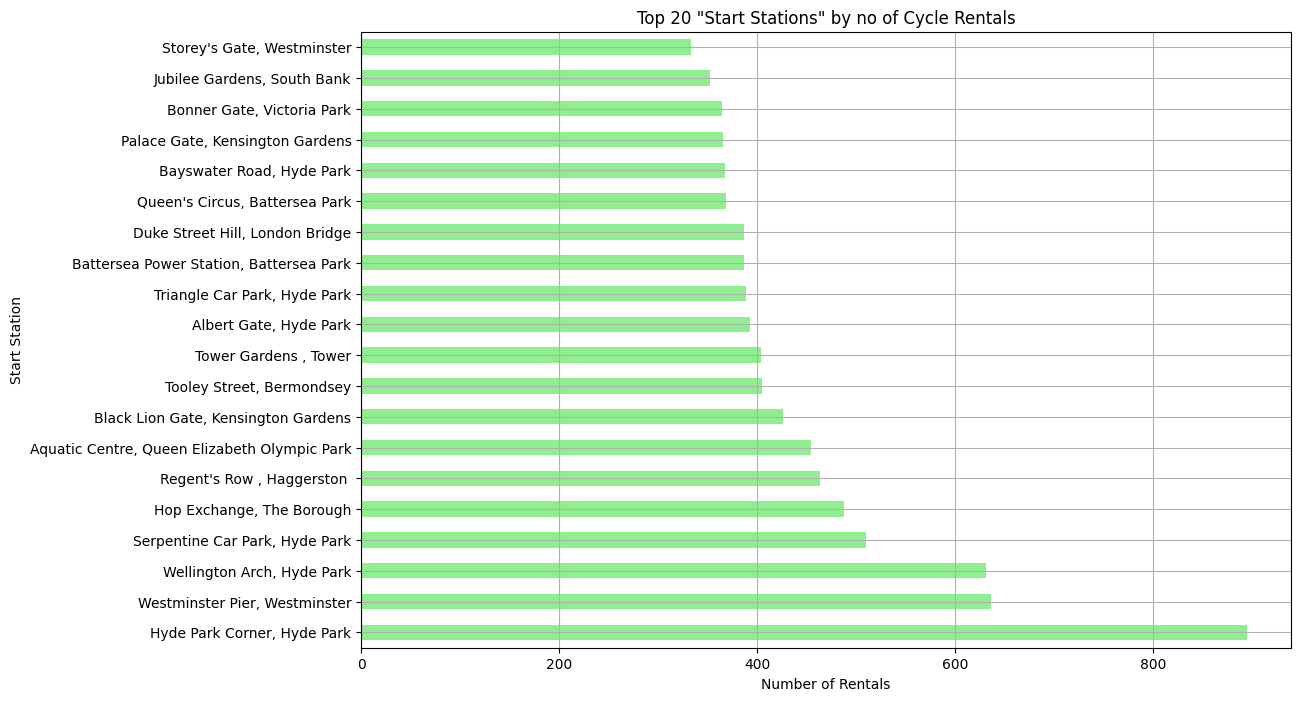

In [ ]:
# plot Top 20 Start stations by number of highest cycle rentals

plt.figure(figsize = (12,8))

rentaltop20_start_stations.plot(kind = 'barh', color='lightgreen')
plt.title('Top 20 "Start Stations" by no of Cycle Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Station')
plt.grid(True)
plt.show()


We will now plot the Top 20 End stations by number of highest cycle rentals.

In [ ]:
rentaltop20_end_stations = final_df_tfl_cycle_rentals['EndStation Name'].value_counts().head(20)

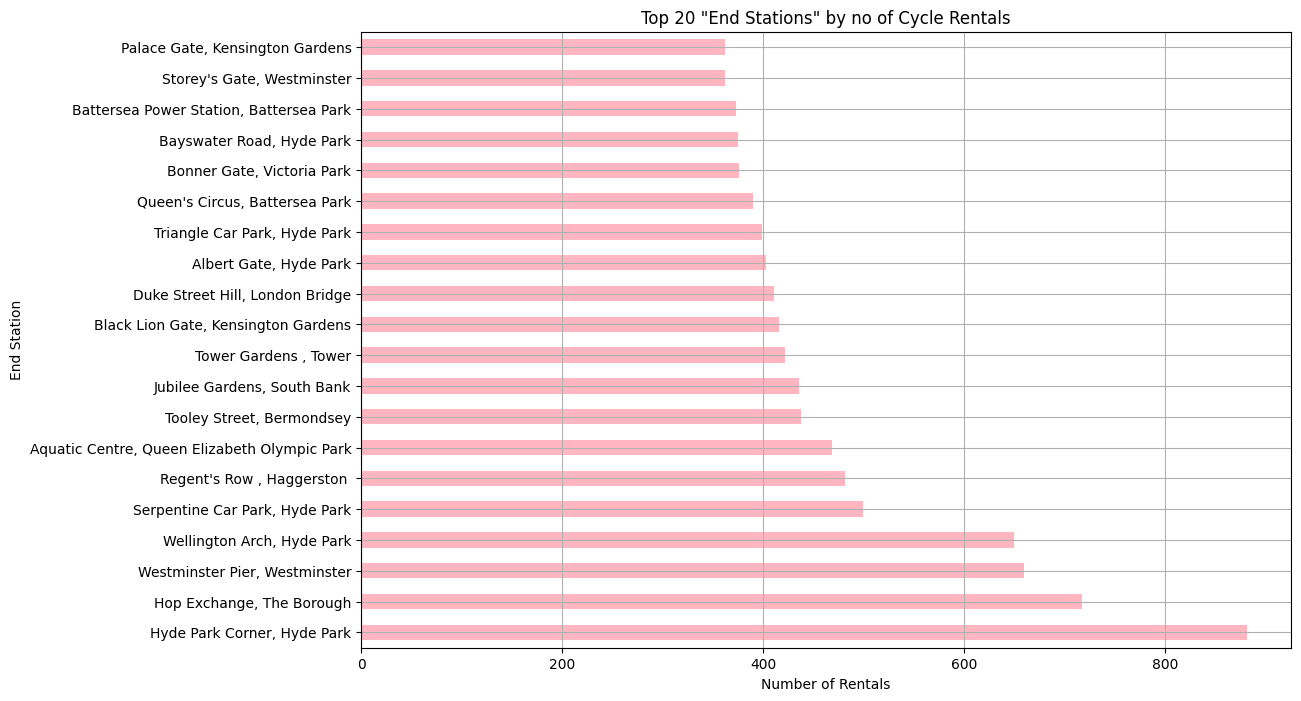

In [ ]:
# plot Top 20 End stations by number of highest cycle rentals

plt.figure(figsize = (12,8))

rentaltop20_end_stations.plot(kind = 'barh', color='lightpink')
plt.title('Top 20 "End Stations" by no of Cycle Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('End Station')
plt.grid(True)
plt.show()


We are onto next set of questions below-

1.   Which hours have the highest rentals?
2.   Is it the busiest on a particular day of the week, or hours on a day, or on weekends?

To find these answers, we will do some time-series analysis of a period of weeks, days and hours for finding out any set patterns of rental trends.


In [ ]:
# Split day of the week, hour of the day and week from the Start Data column


#Extract hour from day
final_df_tfl_cycle_rentals['Hour of the Day'] = final_df_tfl_cycle_rentals['Start Date'].dt.hour

final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14


In [ ]:
#final_df_tfl_cycle_rentals.drop(['Hour','Hour of the Day','Day','Day of the week'], axis=1, inplace = True)

In [ ]:
# Extract day from date
final_df_tfl_cycle_rentals['Day of the week'] = final_df_tfl_cycle_rentals['Start Date'].dt.day_name()

final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday


In [ ]:
#Extract week from date

final_df_tfl_cycle_rentals['Date of the Month'] = final_df_tfl_cycle_rentals['Start Date'].dt.day

final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week,Date of the Month
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday,3
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday,3
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday,30
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday,30
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday,1


Below steps are to check the range of unique Months and unique Date digits that we have in the dataset. This is done because I wanted to understand which dates are more significant than others, same for months.


In [ ]:
# checking range of unique 'dates' in the dataset. Looks like we have all records only from these dates
final_df_tfl_cycle_rentals['Date of the Month'].unique()


array([ 3, 30,  1, 31,  4,  5,  2], dtype=int32)

In [ ]:
# Splitting by Month name, to see what all months we have in the dataset

final_df_tfl_cycle_rentals['Month'] = final_df_tfl_cycle_rentals['Start Date'].dt.month_name()



In [ ]:
# Doing this to see how many unique months in the dataset

final_df_tfl_cycle_rentals['Month'].unique()

array(['January', 'December'], dtype=object)

In [ ]:
# As we have data for only Dec and Jan in the dataset, doing the below to see how many unique dates within these two months in the dataset.
#This will give an idea if we have enough data for further time-series analysis

final_df_tfl_cycle_rentals.loc[final_df_tfl_cycle_rentals['Month']=='December', 'Date of the Month'].unique()

array([30, 31], dtype=int32)

In [ ]:
final_df_tfl_cycle_rentals.loc[final_df_tfl_cycle_rentals['Month']=='January', 'Date of the Month'].unique()

array([3, 1, 4, 5, 2], dtype=int32)

The small bit of analyses in the last cells show that we have all records for only 7 unique dates from 2020 and 2021 - Dec 30 and 31st 2020, and for dates in [3, 1, 4, 5, 2] for Jan 2021.

## **Cycle Rental trend analysis - Hours/Week/Days**

We can start with the trend analysis on basis of the hours, weeks and day data that we have split from the entire START and END date columns previously.

In [ ]:
#Analysing hourly trends

hourly_rentals = final_df_tfl_cycle_rentals.groupby(['Hour of the Day']).size()
hourly_rentals

Hour of the Day
0      1166
1       746
2       491
3       371
4       275
5       320
6       917
7      2165
8      2919
9      3073
10     4071
11     6058
12     8492
13    10536
14    10967
15     9712
16     8055
17     6001
18     4964
19     3831
20     2669
21     2147
22     1709
23     1347
dtype: int64

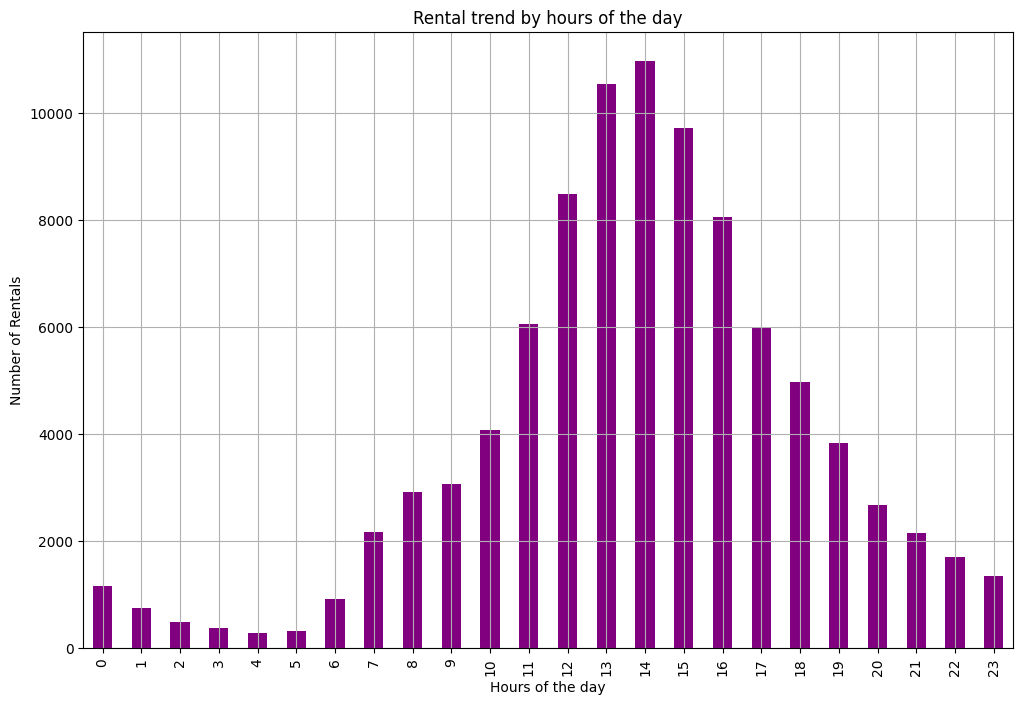

In [ ]:
# Plot the hourly trends

plt.figure(figsize= (12, 8))
hourly_rentals.plot(kind = 'bar', color='purple')
plt.title('Rental trend by hours of the day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

We will analyse the rental trends as per days of the week now.

In [ ]:
#quickly grabbing the dataset
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week,Date of the Month,Month
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday,3,January
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday,3,January
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday,30,December
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday,30,December
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday,1,January


In [ ]:
#Fetching the days of the week with highest rental numbers, in descending order

weekly_rentals_desc = final_df_tfl_cycle_rentals.groupby(['Day of the week']).size().sort_values(ascending = False)
weekly_rentals_desc

Day of the week
Saturday     17316
Wednesday    16882
Thursday     14832
Sunday       13448
Friday       10829
Monday       10271
Tuesday       9424
dtype: int64

In [ ]:
# Now fetching the days of the week with highest rental numbers, and resetting the index for plotting

weekly_rentals = final_df_tfl_cycle_rentals.groupby(['Day of the week']).size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekly_rentals


Day of the week
Monday       10271
Tuesday       9424
Wednesday    16882
Thursday     14832
Friday       10829
Saturday     17316
Sunday       13448
dtype: int64

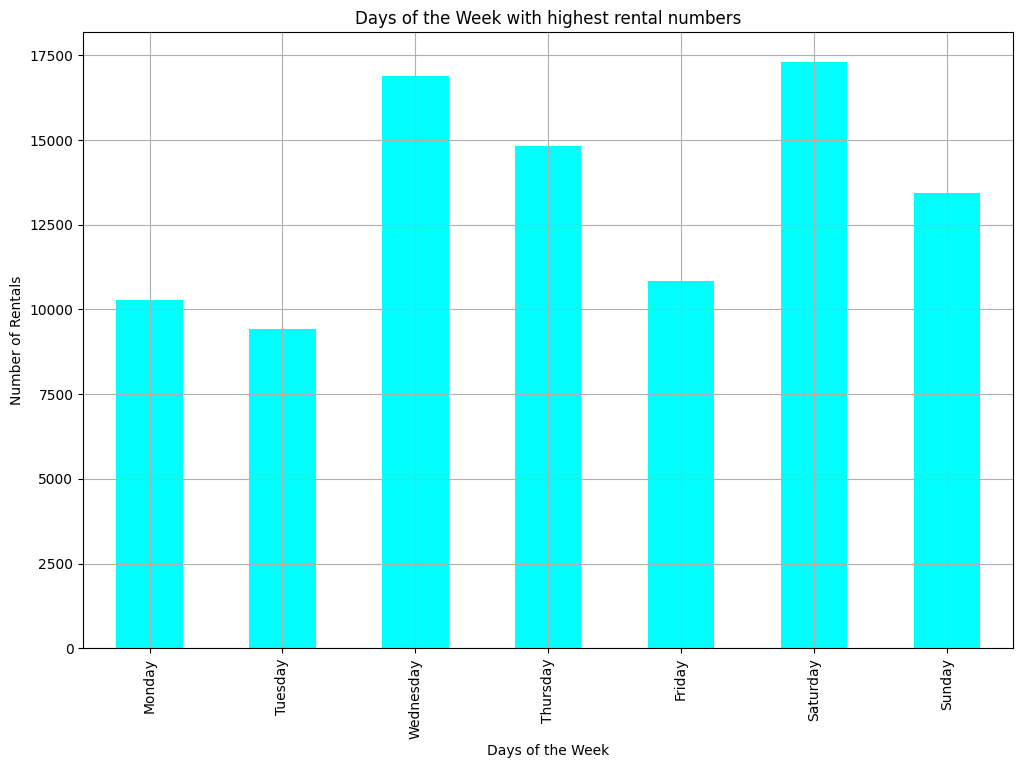

In [ ]:
#Plotting the weekly rentals

plt.figure(figsize = (12, 8))
weekly_rentals.plot(kind='bar', color='cyan')
plt.title('Days of the Week with highest rental numbers')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

Clearly, Saturday is the day with highest number of cycle rentals in the entire week. The business must focus on the weekends as its only logical because people go out on weekends and would prefer a more casual mode of transport such as cycles, if they are NOT in a hurry to reach somewhere.

In [ ]:
# Now fetching the DATES from the months that we have in the dataset. to understand, which month or which date in particular did better in terms of higher rentals.

monthly_rentals = final_df_tfl_cycle_rentals.groupby(['Month']).size() #.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
monthly_rentals

Month
December    31714
January     61288
dtype: int64

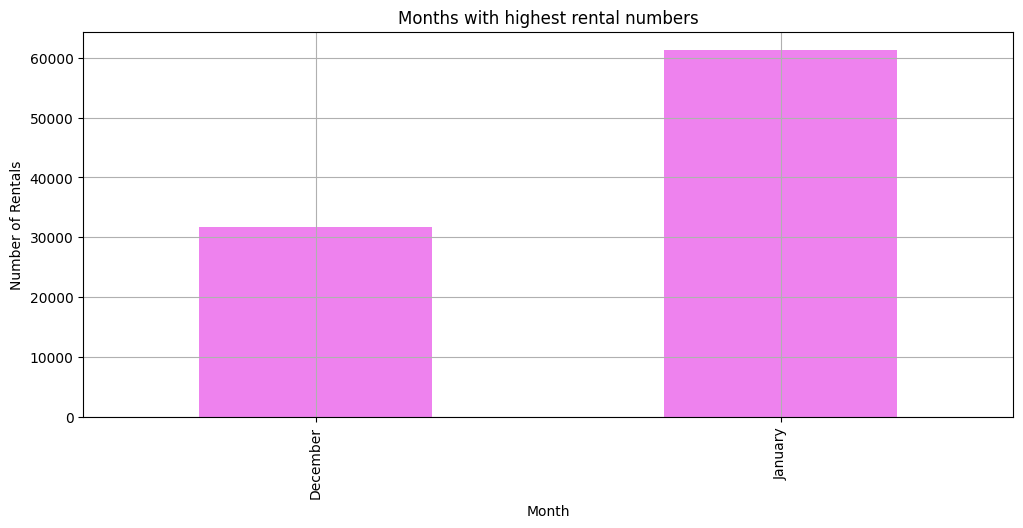

In [ ]:
#Plot monthly rentals

plt.figure(figsize = (12, 5))
monthly_rentals.plot(kind='bar', color='violet')
plt.title('Months with highest rental numbers')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()




In [ ]:
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week,Date of the Month,Month
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday,3,January
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday,3,January
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday,30,December
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday,30,December
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday,1,January


In [ ]:
# Below to revise the 2 Dates from December and 5 Dates from January that we have for all the records in the dataset

final_df_tfl_cycle_rentals.loc[final_df_tfl_cycle_rentals['Month']=='December', 'Date of the Month'].unique()


array([30, 31], dtype=int32)

In [ ]:
final_df_tfl_cycle_rentals.loc[final_df_tfl_cycle_rentals['Month']=='January', 'Date of the Month'].unique()

array([3, 1, 4, 5, 2], dtype=int32)

In [ ]:
#Below two installation and import to be able to hover cursor for showing the dates of the month
# !pip install mplcursors
# import mplcursors as mpl



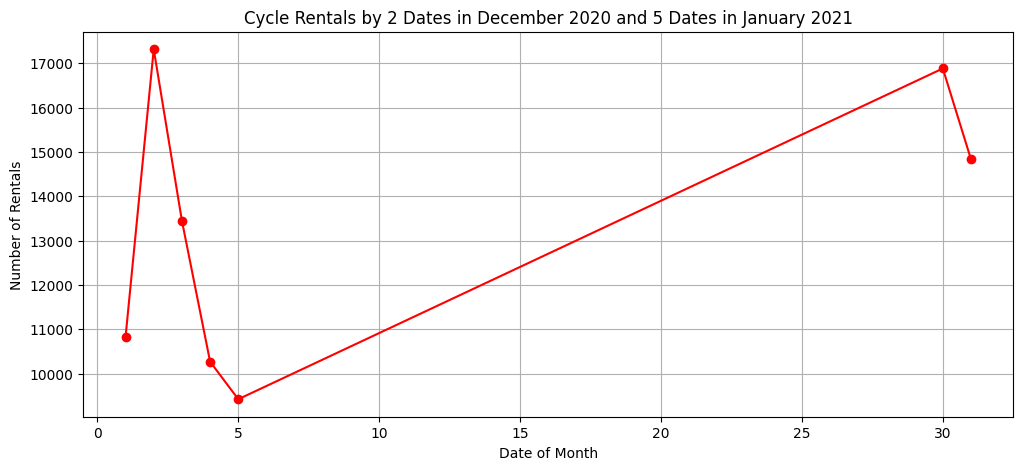

In [ ]:
# Analyzing daily trends within the month
# Below Line chart plots the 7 data points for 7 total dates in the dataset.

date_wise_rentals_per_month = final_df_tfl_cycle_rentals.groupby('Date of the Month').size()
plt.figure(figsize=(12, 5))
date_wise_rentals_per_month.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Cycle Rentals by 2 Dates in December 2020 and 5 Dates in January 2021')
plt.xlabel('Date of Month')
plt.ylabel('Number of Rentals')
plt.grid(True)
#mpl.cursor(hover=True)
plt.show()

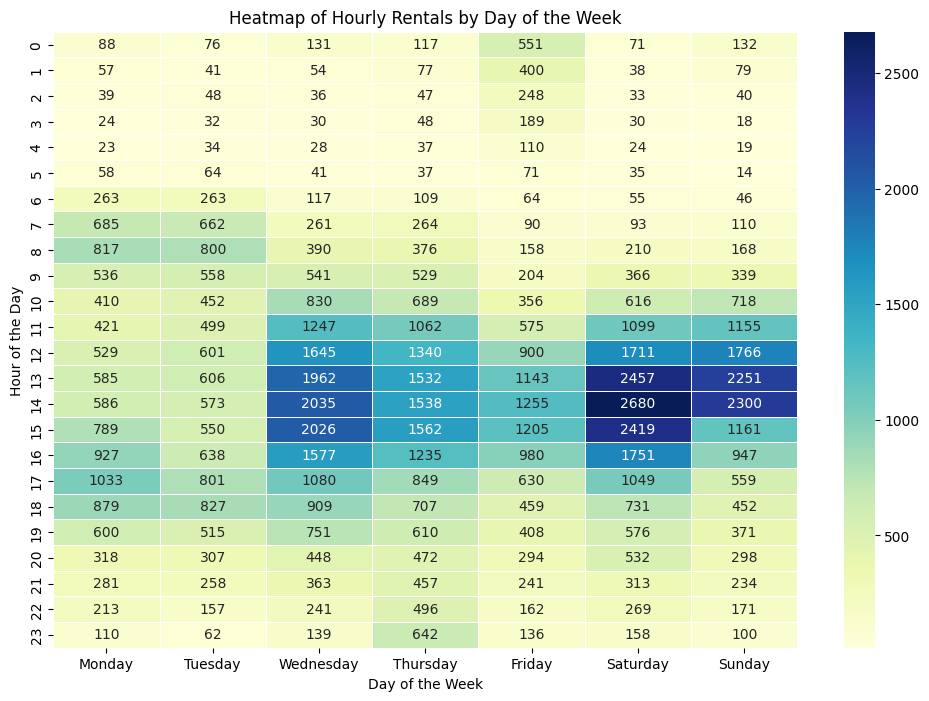

In [ ]:
# Heatmap of Hourly Rentals by Day of the Week
pivot_table = final_df_tfl_cycle_rentals.pivot_table(index='Hour of the Day', columns='Day of the week', values='Rental Id', aggfunc='count')
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap of Hourly Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

# **Station popularity analysis**

We will now analyze the patterns in the usage of the stations and try to identify any relevant factors that might influence station popularity.

Few things we can analyse here are-

1. No of trips starting from each station
2. No of trips ending at each station
3. Calculate total activity at each station (by merging start and end trips)
4. Find out the most popular and least popular stations in terms of highest activity
5. Visualize the findings

In [ ]:
# No of trips starting from each station

start_station_total_trips = final_df_tfl_cycle_rentals['StartStation Name'].value_counts().reset_index()
start_station_total_trips.columns = ['Start Station','Total Start trips']
start_station_total_trips.head()

,Start Station,Total Start trips
0,"Hyde Park Corner, Hyde Park",895
1,"Westminster Pier, Westminster",636
2,"Wellington Arch, Hyde Park",631
3,"Serpentine Car Park, Hyde Park",510
4,"Hop Exchange, The Borough",488


In [ ]:
# No of trips Ending at each station

end_station_total_trips = final_df_tfl_cycle_rentals['EndStation Name'].value_counts().reset_index()
end_station_total_trips.columns = ['End Station','Total End trips']
end_station_total_trips.head()

,End Station,Total End trips
0,"Hyde Park Corner, Hyde Park",881
1,"Hop Exchange, The Borough",717
2,"Westminster Pier, Westminster",659
3,"Wellington Arch, Hyde Park",649
4,"Serpentine Car Park, Hyde Park",499


In [ ]:
# We will merge the START and END counts for each station to get a full picture of the station activity

station_activity = pd.merge(start_station_total_trips, end_station_total_trips, left_on = 'Start Station', right_on = 'End Station', how = 'outer')
station_activity.fillna(0, inplace=True)
station_activity

,Start Station,Total Start trips,End Station,Total End trips
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881
1,"Westminster Pier, Westminster",636,"Westminster Pier, Westminster",659
2,"Wellington Arch, Hyde Park",631,"Wellington Arch, Hyde Park",649
3,"Serpentine Car Park, Hyde Park",510,"Serpentine Car Park, Hyde Park",499
4,"Hop Exchange, The Borough",488,"Hop Exchange, The Borough",717
...,...,...,...,...
786,"Colet Gardens, Hammersmith",21,"Colet Gardens, Hammersmith",16
787,"Clarges Street, Mayfair",21,"Clarges Street, Mayfair",26
788,"Carey Street, Holborn",19,"Carey Street, Holborn",17
789,"Sirdar Road, Avondale",19,"Sirdar Road, Avondale",23


In [ ]:
# Calculate total activity at each station (summation of both START and END station activities)


station_activity['Total trips (Start+End) per Station'] = station_activity['Total Start trips'] + station_activity['Total End trips']
station_activity

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881,1776
1,"Westminster Pier, Westminster",636,"Westminster Pier, Westminster",659,1295
2,"Wellington Arch, Hyde Park",631,"Wellington Arch, Hyde Park",649,1280
3,"Serpentine Car Park, Hyde Park",510,"Serpentine Car Park, Hyde Park",499,1009
4,"Hop Exchange, The Borough",488,"Hop Exchange, The Borough",717,1205
...,...,...,...,...,...
786,"Colet Gardens, Hammersmith",21,"Colet Gardens, Hammersmith",16,37
787,"Clarges Street, Mayfair",21,"Clarges Street, Mayfair",26,47
788,"Carey Street, Holborn",19,"Carey Street, Holborn",17,36
789,"Sirdar Road, Avondale",19,"Sirdar Road, Avondale",23,42


In [ ]:
#Sort the station list in descending to find the most popular and least popular stations by total count of trips

station_activity.sort_values(by='Total trips (Start+End) per Station', ascending = False, inplace=True)
station_activity

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881,1776
1,"Westminster Pier, Westminster",636,"Westminster Pier, Westminster",659,1295
2,"Wellington Arch, Hyde Park",631,"Wellington Arch, Hyde Park",649,1280
4,"Hop Exchange, The Borough",488,"Hop Exchange, The Borough",717,1205
3,"Serpentine Car Park, Hyde Park",510,"Serpentine Car Park, Hyde Park",499,1009
...,...,...,...,...,...
785,"Malmesbury Road, Bow",22,"Malmesbury Road, Bow",20,42
789,"Sirdar Road, Avondale",19,"Sirdar Road, Avondale",23,42
786,"Colet Gardens, Hammersmith",21,"Colet Gardens, Hammersmith",16,37
788,"Carey Street, Holborn",19,"Carey Street, Holborn",17,36


In [ ]:
# Fetch the most popular station in terms of highest total trips

station_activity.head(1)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881,1776


In [ ]:
# Fetch the TOP 10 most popular stations in terms of highest total trips

station_activity.head(10)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881,1776
1,"Westminster Pier, Westminster",636,"Westminster Pier, Westminster",659,1295
2,"Wellington Arch, Hyde Park",631,"Wellington Arch, Hyde Park",649,1280
4,"Hop Exchange, The Borough",488,"Hop Exchange, The Borough",717,1205
3,"Serpentine Car Park, Hyde Park",510,"Serpentine Car Park, Hyde Park",499,1009
5,"Regent's Row , Haggerston",464,"Regent's Row , Haggerston",481,945
6,"Aquatic Centre, Queen Elizabeth Olympic Park",455,"Aquatic Centre, Queen Elizabeth Olympic Park",468,923
8,"Tooley Street, Bermondsey",405,"Tooley Street, Bermondsey",438,843
7,"Black Lion Gate, Kensington Gardens",426,"Black Lion Gate, Kensington Gardens",416,842
9,"Tower Gardens , Tower",404,"Tower Gardens , Tower",422,826


In [ ]:
# Fetch the least popular station in terms of least total trips

station_activity.tail(1)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
790,"South Quay East, Canary Wharf",10,"South Quay East, Canary Wharf",12,22


In [ ]:
# Fetch the BOTTOM 10 least popular stations in terms of least total trips

station_activity.tail(10)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
778,"Stonecutter Street, Holborn",27,"Stonecutter Street, Holborn",22,49
771,"Santos Road, Wandsworth",30,"Santos Road, Wandsworth",18,48
787,"Clarges Street, Mayfair",21,"Clarges Street, Mayfair",26,47
781,"Drummond Street , Euston",25,"Drummond Street , Euston",21,46
784,"Kingsway, Covent Garden",22,"Kingsway, Covent Garden",23,45
785,"Malmesbury Road, Bow",22,"Malmesbury Road, Bow",20,42
789,"Sirdar Road, Avondale",19,"Sirdar Road, Avondale",23,42
786,"Colet Gardens, Hammersmith",21,"Colet Gardens, Hammersmith",16,37
788,"Carey Street, Holborn",19,"Carey Street, Holborn",17,36
790,"South Quay East, Canary Wharf",10,"South Quay East, Canary Wharf",12,22


In [ ]:
#Rename the 'Total trips (Start+End) per Station' column

station_activity.rename(columns = {'Total trips (Start+End) per Station': 'Total trips'}, inplace=True)
station_activity
#station_activity.head()

,Start Station,Total Start trips,End Station,Total End trips,Total trips
0,"Hyde Park Corner, Hyde Park",895,"Hyde Park Corner, Hyde Park",881,1776
1,"Westminster Pier, Westminster",636,"Westminster Pier, Westminster",659,1295
2,"Wellington Arch, Hyde Park",631,"Wellington Arch, Hyde Park",649,1280
4,"Hop Exchange, The Borough",488,"Hop Exchange, The Borough",717,1205
3,"Serpentine Car Park, Hyde Park",510,"Serpentine Car Park, Hyde Park",499,1009
...,...,...,...,...,...
785,"Malmesbury Road, Bow",22,"Malmesbury Road, Bow",20,42
789,"Sirdar Road, Avondale",19,"Sirdar Road, Avondale",23,42
786,"Colet Gardens, Hammersmith",21,"Colet Gardens, Hammersmith",16,37
788,"Carey Street, Holborn",19,"Carey Street, Holborn",17,36


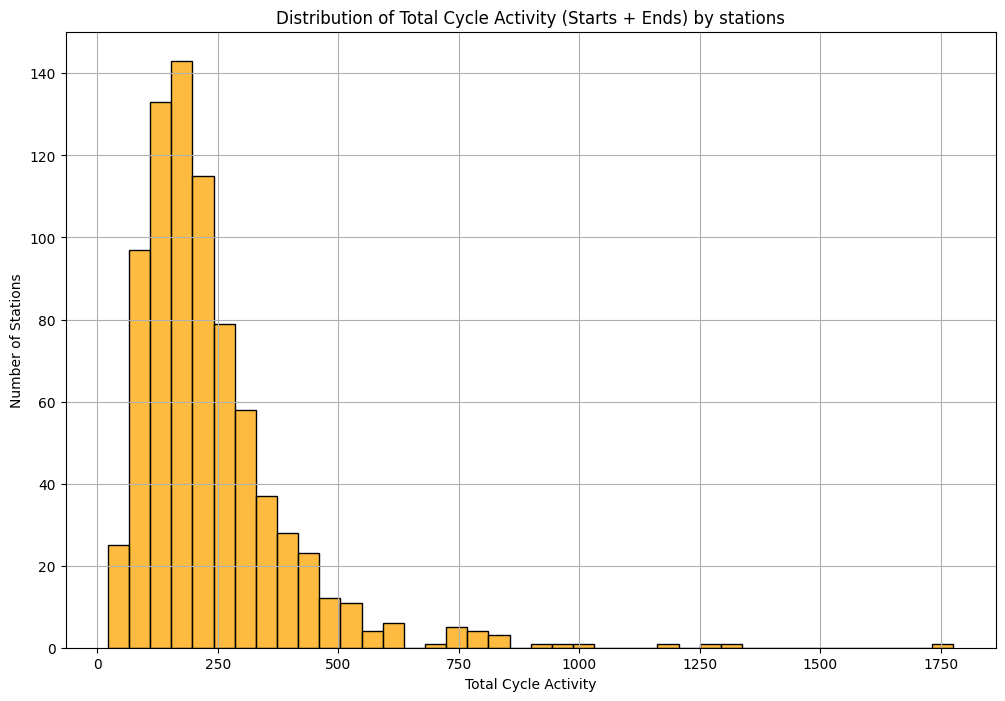

In [ ]:
#Let's see the distribution of station activity

plt.figure(figsize=(12, 8))
sns.histplot(station_activity['Total trips'], bins=40, kde=False, color='orange')
plt.title('Distribution of Total Cycle Activity (Starts + Ends) by stations')
plt.xlabel('Total Cycle Activity')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

# **Behavioural analysis**

For our dataset, its not possible to directly perform any specific user behaviour analysis due to the lack of any user information, loyalty or membership columns.

However, using the 'Bike Id' column in the dataset, its possible to uncover some user behavior depending on frequency of bike usage patterns. This could provide some insights on users who are frequent bike renters.

In [ ]:
# Analyzing bike usage frequency to infer potential user behavior

cycle_usage_freq = final_df_tfl_cycle_rentals['Bike Id'].value_counts().reset_index()
cycle_usage_freq.columns = ['Bike Id','Use Count']
cycle_usage_freq.head()

,Bike Id,Use Count
0,19784,51
1,17781,46
2,19290,43
3,18033,41
4,18855,41


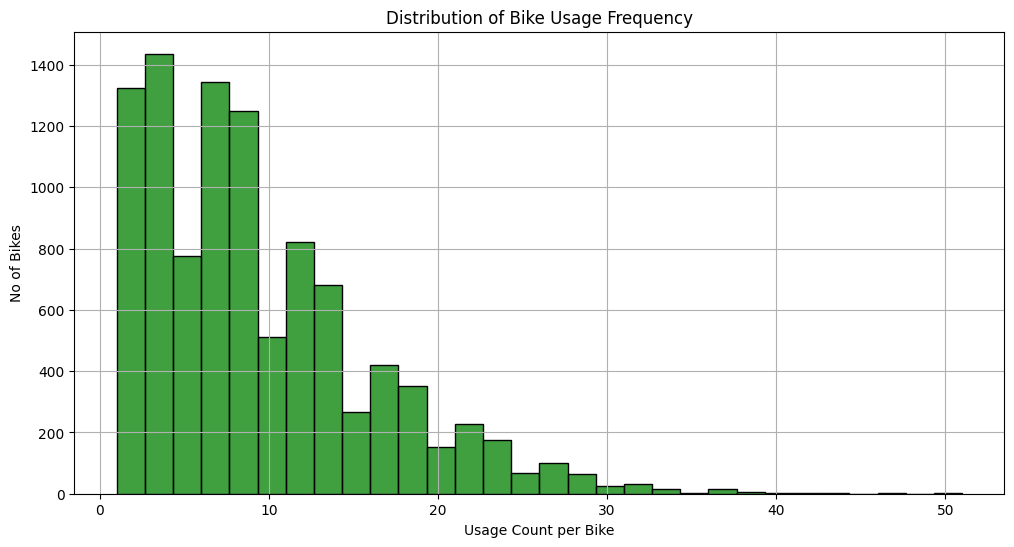

In [ ]:
# Displaying the distribution of bike usage as per count

plt.figure(figsize = (12, 6))
sns.histplot(cycle_usage_freq['Use Count'], bins=30, kde=False, color='green')
plt.title('Distribution of Bike Usage Frequency')
plt.xlabel('Usage Count per Bike')
plt.ylabel('No of Bikes')
plt.grid(True)
plt.show()

In [ ]:
# Identifying the most used bikes

print("Top 10 Most Used Bikes:")
cycle_usage_freq.head(10)


Top 10 Most Used Bikes:


,Bike Id,Use Count
0,19784,51
1,17781,46
2,19290,43
3,18033,41
4,18855,41
5,19863,41
6,19185,40
7,19542,39
8,19619,38
9,18616,38


In [ ]:
# Identifying the least used bikes

print("\nTop 10 Least Used Bikes:")
cycle_usage_freq.tail(10)


Top 10 Least Used Bikes:


,Bike Id,Use Count
10068,7418,1
10069,2970,1
10070,2313,1
10071,13196,1
10072,9402,1
10073,868,1
10074,12659,1
10075,6685,1
10076,13505,1
10077,16917,1


In [ ]:
# To analyse if certain bikes are predominantly used at specific stations or times
# This can give an idea of target user preferences from operational strategy perspective

cycle_start_station_usage = final_df_tfl_cycle_rentals.groupby(['Bike Id', 'StartStation Name']).size().reset_index(name='Count')
most_used_cycles_at_start_station = cycle_usage_freq.head(10)['Bike Id']



In [ ]:
cycle_start_station_usage.head()

,Bike Id,StartStation Name,Count
0,2,"All Saints' Road, Portobello",1
1,2,"Cadogan Place, Knightsbridge",1
2,2,"Ravenscourt Park Station, Hammersmith",1
3,4,"Black Prince Road, Vauxhall",1
4,4,"Eel Brook Common, Walham Green",1


In [ ]:
most_used_cycles_at_start_station

0    19784
1    17781
2    19290
3    18033
4    18855
5    19863
6    19185
7    19542
8    19619
9    18616
Name: Bike Id, dtype: int64

Using the list containing most frequently used bikes, we can now find out which stations are most preferred stations for most-used cycles.

In [ ]:
for bike in most_used_cycles_at_start_station:
  start_station_specific_cycle_stats = cycle_start_station_usage[cycle_start_station_usage['Bike Id']==bike]
  top_5_start_station = start_station_specific_cycle_stats.sort_values(by='Count', ascending=False).head()
  print(top_5_start_station)


       Bike Id                 StartStation Name  Count
79270    19784  Edgware Road Station, Marylebone      3
79293    19784         Tooley Street, Bermondsey      3
79290    19784      South Wharf Road, Paddington      2
79278    19784     Harriet Street, Knightsbridge      2
79285    19784          Rampayne Street, Pimlico      2
       Bike Id                          StartStation Name  Count
56073    17781                Frampton Street, Paddington      6
56075    17781  Gloucester Road Station, South Kensington      3
56072    17781        Finsbury Leisure Centre, St. Luke's      3
56079    17781                Hyde Park Corner, Hyde Park      3
56087    17781             Queen's Circus, Battersea Park      2
       Bike Id                  StartStation Name  Count
72840    19290          Wright's Lane, Kensington      3
72826    19290  Knaresborough Place, Earl's Court      3
72832    19290        Penywern Road, Earl's Court      3
72829    19290                Newby Place, Pop

# **Model Building phase**

Now we will proceed with building a machine learning model to extract more insights for a successful cycle rental business and for further recommendations.

In [ ]:
#import necessary libraries for ML model building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

A machine learning algorithm doesn't understand non-numeric language. So prior to model building, we will need to convert all categorical features into numerical values, also known as 'one-hot encoding' technique.

In [ ]:
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week,Date of the Month,Month
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday,3,January
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday,3,January
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday,30,December
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday,30,December
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday,1,January


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()


final_df_tfl_cycle_rentals['Encoded Start station'] = label_encoder.fit_transform(final_df_tfl_cycle_rentals['StartStation Name'])
final_df_tfl_cycle_rentals['Encoded End station'] = label_encoder.fit_transform(final_df_tfl_cycle_rentals['EndStation Name'])
final_df_tfl_cycle_rentals['Encoded Day of Week'] = label_encoder.fit_transform(final_df_tfl_cycle_rentals['Day of the week'])
final_df_tfl_cycle_rentals['Encoded Month'] = label_encoder.fit_transform(final_df_tfl_cycle_rentals['Month'])


In [ ]:
final_df_tfl_cycle_rentals.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Hour of the Day,Day of the week,Date of the Month,Month,Encoded Start station,Encoded End station,Encoded Day of Week,Encoded Month
0,104820582,1620,22,2021-01-03 15:14:00,11,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",14,Sunday,3,January,595,104,3,1
1,104816169,1740,10755,2021-01-03 13:26:00,542,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",12,Sunday,3,January,468,595,3,1
2,104757113,1620,18908,2020-12-30 15:00:00,239,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",14,Wednesday,30,December,354,741,6,0
3,104749458,780,18499,2020-12-30 09:21:00,766,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",9,Wednesday,30,December,618,564,6,0
4,104788389,5400,15668,2021-01-01 16:29:00,655,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",14,Friday,1,January,175,175,0,1


# Feature Engineering

In this phase, we will define relevant features from the dataset, and a target variable - which will be the output by the built model.


In [ ]:
features = ['Encoded Start station', 'Encoded End station', 'Hour of the Day', 'Date of the Month', 'Encoded Day of Week', 'Encoded Month']

target = 'Duration'


In [ ]:
#Split data into Training and Testing in 80/20 % ratio

X_train, X_test, y_train, y_test = train_test_split(final_df_tfl_cycle_rentals[features], final_df_tfl_cycle_rentals[target], test_size = 0.2, random_state = 42)

# Choosing a model type - Random Forest Regressor

In [ ]:
# Choosing  RandomForestRegressor

randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test dataset

y_pred = randomforest_model.predict(X_test)


# **Model Evaluation**

Its now time for evaluating the model performance. Mean Squared Error (MSE) and R-Squared error (R²)  is one of the best evaluation metrics for regression problems such as this one.

In [ ]:
# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 42538598.27588602
R² Score: -0.05730202592496436


In [ ]:
# Evaluate additional metrics for the Random Forest model

from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1096.9864308921956


# **Findings**

# **Recommendations**